In [1]:
!pip install statsmodels

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA

In [2]:
datos = pd.read_csv("sunflares.csv")

In [3]:
datos.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [4]:
# Convertir columnas a fecha en formato datetime
datos['start.date'] = pd.to_datetime(datos['start.date'])
datos['peak'] = pd.to_datetime(datos['peak'])

/tmp/ipykernel_2847/1989543565.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos['peak'] = pd.to_datetime(datos['peak'])


In [6]:
datos.sort_values(by='start.date', inplace=True)

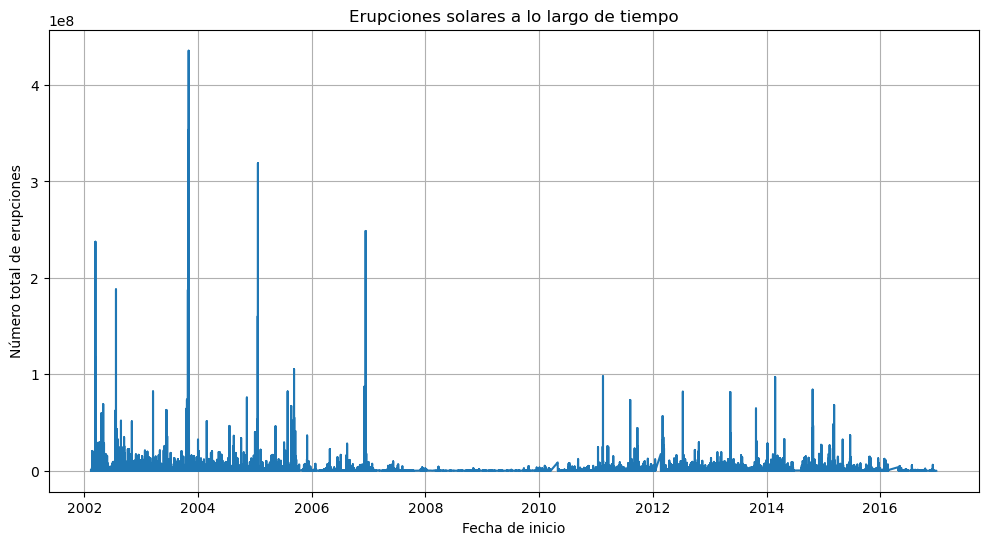

In [8]:
plt.figure(figsize=(12,6))
plt.plot(datos['start.date'], datos['total.counts'])
plt.title("Erupciones solares a lo largo de tiempo")
plt.xlabel("Fecha de inicio")
plt.ylabel("Número total de erupciones")
plt.grid(True)
plt.show()

In [9]:
datos['year_month'] = datos['start.date'].dt.to_period('M')

In [12]:
erupciones_por_mes= datos.groupby('year_month').size()

In [13]:
erupciones_por_mes.head()

year_month
2002-02     231
2002-03     571
2002-04     493
2002-05    1165
2002-06     388
Freq: M, dtype: int64

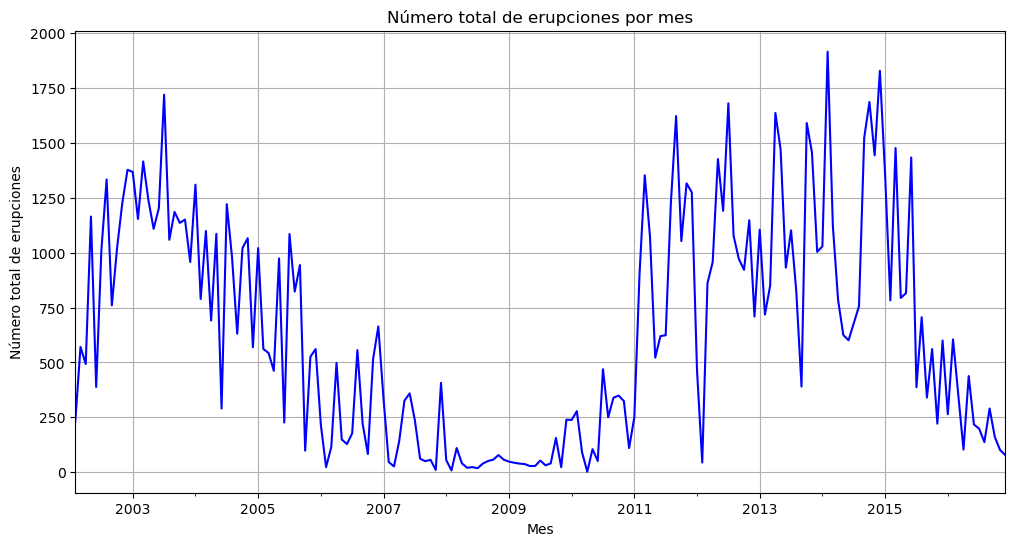

In [14]:
plt.figure(figsize=(12,6))
erupciones_por_mes.plot(kind='line', color='b', linestyle='-')
plt.title("Número total de erupciones por mes")
plt.xlabel("Mes")
plt.ylabel("Número total de erupciones")
plt.grid(True)
plt.show()

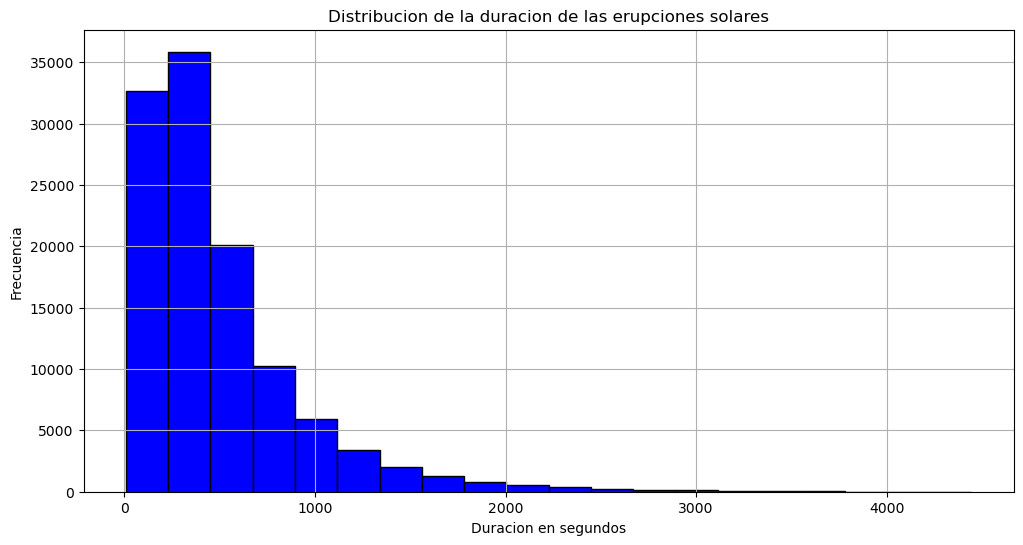

In [15]:
# Distribucion de duracion de erupciones
plt.figure(figsize=(12,6))
plt.hist(datos['duration.s'], bins=20, color='blue', edgecolor='black')
plt.title("Distribucion de la duracion de las erupciones solares")
plt.xlabel("Duracion en segundos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

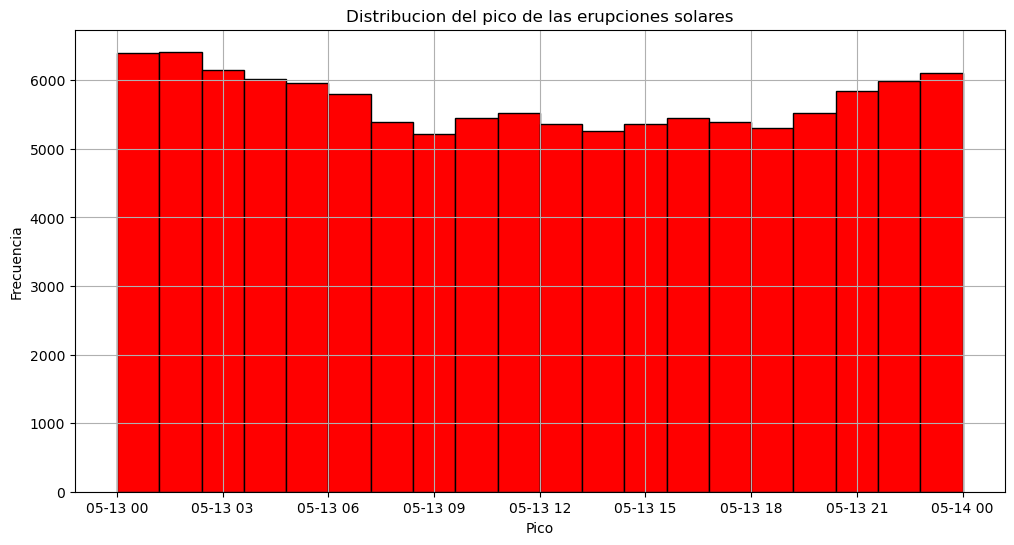

In [16]:
# Gráfica de la distribucion de picos de las erupciones
plt.figure(figsize=(12,6))
plt.hist(datos['peak'], bins=20, color='red', edgecolor='black')
plt.title("Distribucion del pico de las erupciones solares")
plt.xlabel("Pico")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [17]:
# Dividir dataset
train_size = int(len(erupciones_por_mes) * 0.8)
trian, test = erupciones_por_mes.iloc[:train_size], erupciones_por_mes.iloc[train_size:]

In [18]:
train_size

141

In [19]:
erupciones_por_mes.shape

(177,)

In [20]:
test.shape

(36,)

In [22]:
# Entrenamiento del modelo
modelo= ARIMA(trian, order=(5,1,0))
modelo_fit=modelo.fit()

modelo_fit

In [23]:
modelo_fit

In [26]:
predicciones=modelo_fit.forecast(steps=len(test))

In [27]:
predicciones[:5]

2013-11    1368.508475
2013-12    1137.721380
2014-01    1116.733588
2014-02    1211.875528
2014-03     850.031822
Freq: M, Name: predicted_mean, dtype: float64

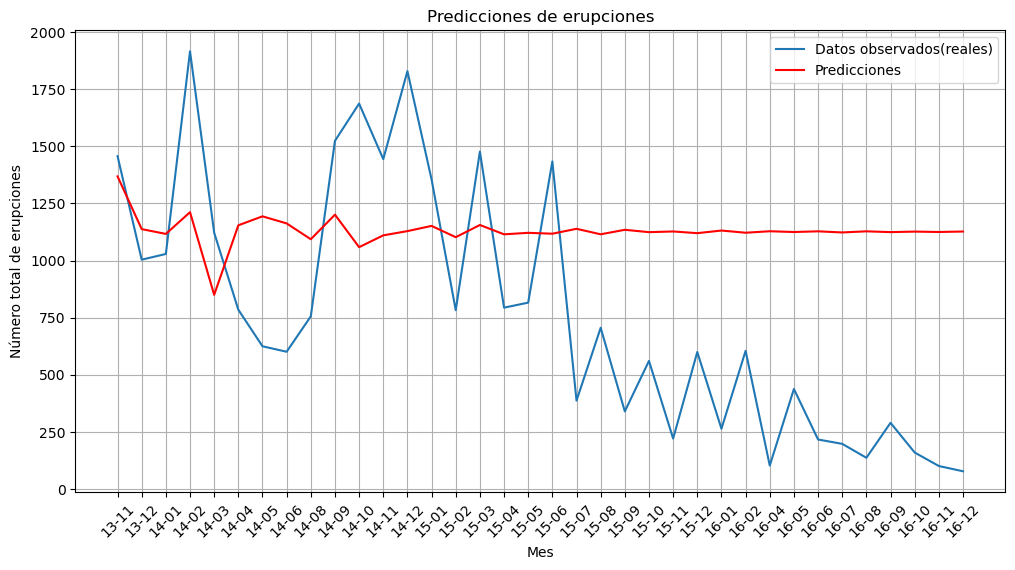

In [30]:
test_index = test.index.strftime("%y-%m") # Convertir los periodos de tiempo a String 

#Gráficar las predicciones
plt.figure(figsize=(12,6))
plt.plot(test_index, test.values, label="Datos observados(reales)")
plt.plot(test_index, predicciones, color='red', label="Predicciones")
plt.title("Predicciones de erupciones")
plt.xlabel("Mes")
plt.ylabel("Número total de erupciones")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()